# Introduction to Matplotlib

## Problem 1. {-}

In [195]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
def problem1_1_1(n):
    A = np.random.normal(size=(n,n))
    row_means     = np.mean(A, axis=1)
    var_row_means = np.var(row_means)
    return var_row_means

In [7]:
def problem1_1_2():
    l = []
    for n in range(100,1001,100):
        l.append(problem1_1_1(n))
    l = np.array(l)
    plt.plot(range(100,1001,100),l)
    plt.show()

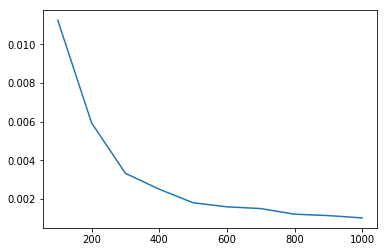

In [8]:
problem1_1_2()

## Problem 2. {-}

In [9]:
def problem1_2():
    x = np.linspace(-2*np.pi, 2*np.pi, 100)
    plt.plot(x, np.sin(x))
    plt.plot(x, np.cos(x))
    plt.plot(x, np.arctan(x))
    plt.show()

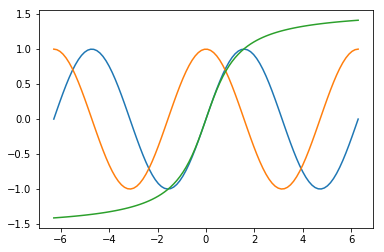

In [10]:
problem1_2()

## Problem 3. {-}

In [11]:
def problem1_3():
    x1 = np.linspace(-2, 1, 100)[:-1]
    f1 = 1 / (x1-1)
    x2 = np.linspace(1, 6, 100)[1:]
    f2 = 1 / (x2-1)
    plt.plot(x1, f1, "m--", lw=4)
    plt.plot(x2, f2, "m--", lw=4)
    plt.xlim(-2, 6)
    plt.ylim(-6, 6)
    plt.show()

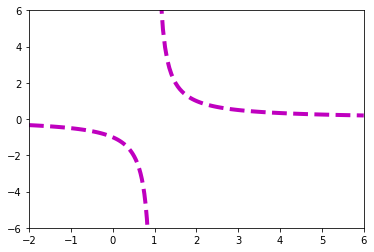

In [12]:
problem1_3()

## Problem 4. {-}

In [13]:
def problem1_4():
    x = np.linspace(0, 2*np.pi, 100)
    y = [np.sin(x), np.sin(2*x), 2*np.sin(x), 2*np.sin(2*x)]
    titles = ["sin(x)", "sin(2x)", "2sin(x)", "2sin(2x)"]
    styles = ["g-", "r--", "b--", "m:"]
    for i in range(4):
        ax = plt.subplot(2,2,i+1)
        ax.plot(x, y[i], styles[i])
        plt.axis([0, 2*np.pi, -2, 2])
        plt.title(titles[i])
        plt.subplots_adjust(hspace=.5, wspace=.3)
    plt.suptitle("The sine function")
    plt.show()

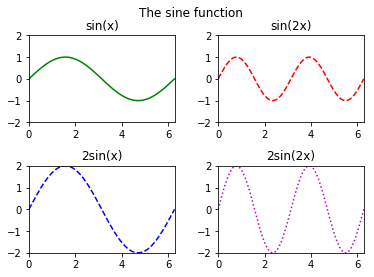

In [14]:
problem1_4()

## Problem 5. {-}

In [15]:
def problem1_5():
    fars = np.load("FARS.npy")
    ax1 = plt.subplot(121)
    ax1.plot(fars.T[1],fars.T[2],"k,")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.axis("equal")
    
    ax2 = plt.subplot(122)
    ax2.hist(fars.T[0], bins=np.arange(0,25))
    plt.xlabel("Hour of crash")
    
    plt.show()

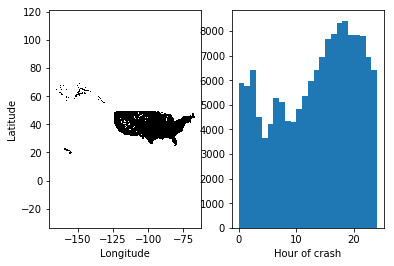

In [16]:
problem1_5()

## Problem 6. {-}

In [17]:
def problem1_6():
    x = np.linspace(-2*np.pi, 2*np.pi, 100)
    y = x.copy()
    X,Y = np.meshgrid(x,y)
    Z = (np.sin(X) * np.sin(Y)) / (X*Y)
    
    plt.subplot(121)
    plt.pcolormesh(X,Y,Z, cmap="magma")
    plt.colorbar()
    plt.axis([-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
    
    plt.subplot(122)
    plt.contour(X,Y,Z, 12, cmap="viridis")
    plt.colorbar()
    plt.axis([-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
    
    plt.plot()

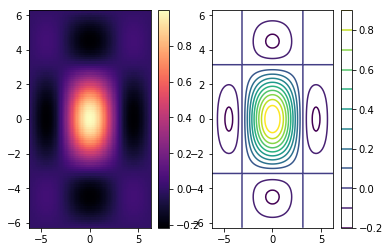

In [18]:
problem1_6()

# Data Visualization 

In [30]:
import scipy

## Problem 1. {-}

In [31]:
def problem2_1():
    ansc = np.load("anscombe.npy")
    x = np.linspace(0,20,100)
    
    comments = [
        "This section looks like a traditional linear relationship with some tight noise. An OLS regression is appropriate.",
        "This section looks like a quadratic relationship would be more appropriate, where a second-order Taylor approximation would better fit the DGP.",
        "This section looks like a perfect linear fit with a considerable outlier that skews the regression.",
        "This section looks like a vertical line of data points, with one outlier to the right side, which skews the regression."
    ]
        
    mean_x = []
    var_x = []
    mean_y = []
    var_y = []
    corr_xy = []
    
    for i in range(0,8,2):
        ax = plt.subplot(2,2,int(i/2+1))
        ax.plot(ansc.T[i],ansc.T[i+1],"ko")
        plt.axis([0,20,0,13])
        lm = scipy.stats.linregress(ansc.T[i],ansc.T[i+1])
        y = np.array(lm[1] + lm[0] * x)
        plt.plot(x,y)
        
        mean_x.append(round(np.mean(ansc.T[i]),2))
        var_x.append(round(np.var(ansc.T[i]),2))
        mean_y.append(round(np.mean(ansc.T[i+1]),2))
        var_y.append(round(np.var(ansc.T[i+1]),2))
        corr_xy.append(round(lm[2],2))
        
        print("SECTION #"+str(int(i/2)+1)+":")
        print(" * The mean in x and y are "+str(mean_x[int(i/2)])+" and "+\
             str(mean_y[int(i/2)])+", respectively.")
        print(" * The variance in x and y are "+str(var_x[int(i/2)])+" and "+\
             str(var_y[int(i/2)])+", respectively.")
        print(" * The correlation coefficient between x and y is "+str(corr_xy[int(i/2)])+".")
    
        print("\n   -> ",comments[int(i/2)],"\n\n-----------")
    
    count_same=0
    for i in [mean_x, var_x, mean_y, var_y, corr_xy]:
        if len(set(i)) == 1:
            count_same+=1
    if count_same == 5:
        print("\n--> All of the sections have identical means, vars, and corrs!")
    else:
        print("\n--> Not all the sections have identical mean, var, and corr.")

    plt.suptitle("Anscombe's Quartet")
    plt.show()

SECTION #1:
 * The mean in x and y are 9.0 and 7.5, respectively.
 * The variance in x and y are 10.0 and 3.75, respectively.
 * The correlation coefficient between x and y is 0.82.

   ->  This section looks like a traditional linear relationship with some tight noise. An OLS regression is appropriate. 

-----------
SECTION #2:
 * The mean in x and y are 9.0 and 7.5, respectively.
 * The variance in x and y are 10.0 and 3.75, respectively.
 * The correlation coefficient between x and y is 0.82.

   ->  This section looks like a quadratic relationship would be more appropriate, where a second-order Taylor approximation would better fit the DGP. 

-----------
SECTION #3:
 * The mean in x and y are 9.0 and 7.5, respectively.
 * The variance in x and y are 10.0 and 3.75, respectively.
 * The correlation coefficient between x and y is 0.82.

   ->  This section looks like a perfect linear fit with a considerable outlier that skews the regression. 

-----------
SECTION #4:
 * The mean in x 

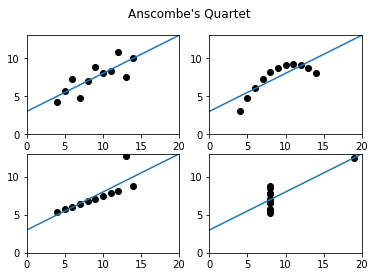

In [32]:
problem2_1()

## Problem 2. {-}

In [33]:
def problem2_2():
    x = np.linspace(0,1,50)
    count=0
    b=[]
    for n in range(4):
        for v in range(n+1):
            plt.subplot(4,4,4*n+1+v)
            b.append(scipy.special.binom(n,v) * (x ** v) * ((1-x) ** (n-v)))
            plt.plot(x, b[count])
            plt.title(r"$(n,v) = $("+str(n)+", "+str(v)+")")
            plt.xticks(np.arange(0, 1+1e-15, step=1))
            plt.yticks(np.arange(0, 1+1e-15, step=1))
            plt.tick_params(axis='both', which='major', labelsize=7)
            count+=1
    plt.axis([0,1,0,1])
    plt.subplots_adjust(hspace=.99, wspace=.4)
    plt.suptitle(r"Bernstein basis polynomials, $\binom{n}{v} x^{v} (1-x)^{n-v}$")
    plt.show()

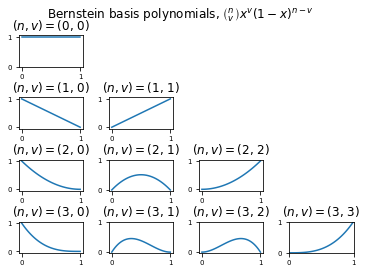

In [34]:
problem2_2()

## Problem 3. {-}

In [35]:
def problem2_3():
    mlb = np.load("MLB.npy")
    height = np.array(mlb.T[0])
    weight = np.array(mlb.T[1])
    age = np.array(mlb.T[2])
    
    plt.subplot(221)
    lm1 = scipy.stats.linregress(height,weight)
    plt.scatter(x=height,y=weight,facecolors="none", edgecolors="k",s=12)
    plt.xlabel("Height (in)", size=13)
    plt.ylabel("Weight (lbs)\nRegressed on\nHeight & Weight", size=13)
    plt.plot(height, lm1[0]*height+lm1[1], color="r")
    
    plt.subplot(222)
    lm2 = scipy.stats.linregress(age,weight)
    plt.scatter(x=age,y=weight,facecolors="none", edgecolors="k",s=12)
    plt.xlabel("Age (yrs)", size=13)
    plt.plot(age, lm2[0]*age+lm2[1], color="r")
    plt.yticks([]," ")
    
    plt.subplot(223)
    plt.hist(weight, bins=15, range=[min(weight),max(weight)+1], color="k")
    plt.xlabel("Weight (lbs)", size=13)
    plt.yticks([]," ")
    plt.ylabel("Distribution of\nWeight & Age", size=13)
    
    plt.subplot(224)
    plt.hist(age, bins=np.arange(20,50), color="k")
    plt.xlabel("Age (yrs)", size=13)
    plt.yticks([]," ")
    
    plt.subplots_adjust(hspace=.5, wspace=.07)
    
    plt.show()

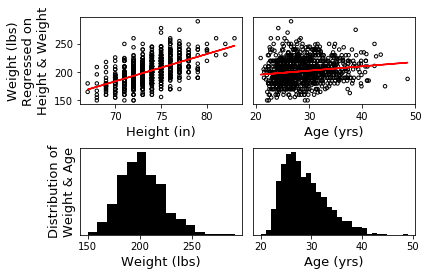

In [36]:
problem2_3()

## Problem 4. {-}

In [37]:
def problem2_4():
    year, mag, long, lat = np.load("earthquakes.npy").T

    fig = plt.figure()
    ax = [fig.add_subplot(221), 
         fig.add_subplot(222),
         fig.add_subplot(223),
         fig.add_subplot(224)]
    
    year_labs = []
    for i in arange(2000,2010):
        year_labs.append("'"+str(i)[-2:])
    year_ints = []
    for i in year:
        year_ints.append(int(i))
    year_ixs = []    
    for k in range(2000,2010):
        year_ixs.append(year_ints.index(k))  
    mags = []
    for j in range(len(year_ixs)):
        mags.append([])
        for i in range(len(mag)):
            if j==0:
                if i>year_ixs[j]:
                    mags[j].append(mag[i])
            else:
                if i>year_ixs[j] and i<year_ixs[j-1]:
                    mags[j].append(mag[i])               
    mags_avgs = []
    mags_avgs_labs=[]
    for i in mags:
        mags_avgs.append((sum(i)/len(i))-5)
        mags_avgs_labs.append(str(round(sum(i)/len(i),2)))

        
    ax[0].hist(year, bins=arange(2000,2011), color="k")
    ax[0].set_title("Earthquake Frequency \nper Year")
    ax[0].set_xticks(arange(2000,2010))
    ax[0].set_xticklabels(year_labs,rotation='vertical')
    
    ax[1].hist(mag, bins=20, range=(5,max(mag)), color="k")
    ax[1].set_title("Earthquake Frequency \nby Magnitude")
    ax[1].set_xticks(arange(5,10))
    
    ax[2].plot(long, lat, "r,")
    ax[2].set_xlabel("Longitude")
    ax[2].set_ylabel("Latitude")
    ax[2].set_title("Location of Earthquakes")
    ax[2].set_aspect("equal")

    ax[3].bar(list(range(2000,2010)),mags_avgs,color="r")
    ax[3].set_yticklabels(mags_avgs_labs)
    ax[3].set_xticks(arange(2000,2010))
    ax[3].set_xticklabels(year_labs,rotation='vertical')
    ax[3].set_title("Average Magnitude of \nRichter-5+ Earthquakes by Year")
    
    plt.subplots_adjust(hspace=.7, wspace=.3)
    plt.show()



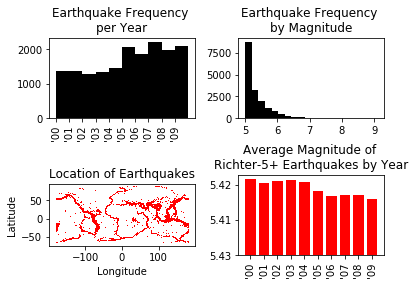

In [38]:
problem2_4()

## Problem 5. {-}

In [39]:
def problem2_5():
    x = np.linspace(-1, 2, 200)
    X,Y = np.meshgrid(x,x)
    Z = (1-X)**2 + 100*(Y-X**2)**2
    
    plt.pcolormesh(X,Y,Z,cmap="inferno")
    plt.colorbar()
    plt.contour(X,Y,Z,[.1,.5,2,8,32,128,1024],colors="w")
    plt.plot(1,1,"r.")
    plt.show()

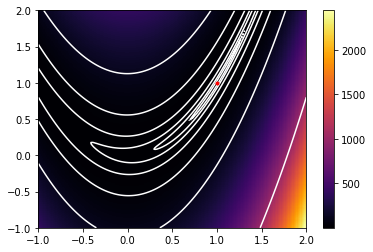

In [40]:
problem2_5()

## Problem 6. {-}

In [318]:
def problem2_6():
    pop, gdp, mh, fh = np.load("countries.npy").T
    countries = ["Austria", "Bolivia", "Brazil", "China",
                "Finland", "Germany", "Hungary", "India",
                "Japan", "North Korea", "Montenegro", "Norway",
                "Peru", "South Korea", "Sri Lanka", "Switzerland",
                "Turkey", "U.K.", "U.S.", "Vietnam"]
    
    fig, ax = plt.subplots(2,2)
    
    h = []
    for i in range(len(mh)):
        h.append((mh[i] + fh[i]) / 2)
    h = np.array(h)
    
    gdp_labs = []    
    for i in range(len(arange(min(gdp),max(gdp)+1,1000))):
        if i%3==0 or i==len(arange(min(gdp),max(gdp)+1,1000))-1:
            gdp_labs.append(str(int(round(arange(min(gdp),max(gdp)+1,1000)[i])/1000))+" T")
        else:
            gdp_labs.append("")
                
    ax[0,0].bar(countries, gdp, color="b")
    ax[0,0].set_yticks(arange(min(gdp),max(gdp)+1,1000))
    ax[0,0].set_yticklabels(gdp_labs,fontsize=8)
    ax[0,0].set_xticks(countries)
    ax[0,0].set_xticklabels(countries,fontsize=7,rotation=90)
    ax[0,0].set_title("GDP by country (USD)")
    
    gdppc = []
    for i in range(len(gdp)):
        gdppc.append(gdp[i] / pop[i])
    gdppc=np.array(gdppc)
        
    ax[0,1].scatter(gdppc, h, color="b")
    lm = scipy.stats.linregress(gdppc, h)
    ax[0,1].plot(gdppc, lm[0]*gdppc+lm[1],"m")
    ax[0,1].set_xticks([0,25,50,75])
    ax[0,1].set_xticklabels(["0", "25 K", "50 K", "75 K"])
    ax[0,1].set_title("Avgerage height (cm) regressed \non GDP per capita (USD)")
    
    ax[1,0].hist(np.sort(pop)[:-2],bins=arange(0,np.sort(pop)[-3]+21,20),color="m")
    ax[1,0].set_title("Population (China, India removed)",size=9)
    ax[1,0].set_ylabel("Frequency")
    ax[1,0].set_yticks([0,2,4,6,8])
    ax[1,0].set_xticks(arange(0,301,100))
    ax[1,0].set_xticklabels(["0 M", "100 M", "200 M", "300 M"])
    
    ax[1,1].hist(gdppc,bins=arange(0,100,10),color="b")
    ax[1,1].set_title("GDP per capita")
    ax[1,1].set_ylabel("Frequency")
    ax[1,1].set_yticks(arange(0,11,2))
    ax[1,1].set_xticks([0,25,50,75])
    ax[1,1].set_xticklabels(["0", "25 K", "50 K", "75 K"])

    plt.subplots_adjust(hspace=.9, wspace=.3)
    plt.show()

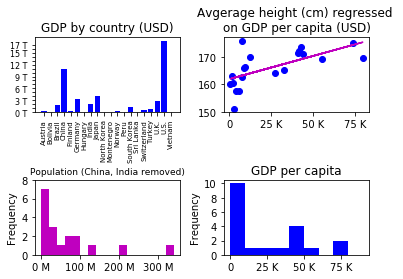

In [319]:
problem2_6()

# Pandas 1 

In [54]:
import pandas as pd
import numpy as np

## Problem 1. {-}

In [45]:
def problem3_1():
    s = pd.Series(np.array(range(0,51,2))**2+1, index = range(0,51,2))

    s[np.array([  i % 3 == 0    for i in range(len(s.index))  ])] = 0

    return s

In [46]:
print(problem3_1())

0        0
2        5
4       17
6        0
8       65
10     101
12       0
14     197
16     257
18       0
20     401
22     485
24       0
26     677
28     785
30       0
32    1025
34    1157
36       0
38    1445
40    1601
42       0
44    1937
46    2117
48       0
50    2501
dtype: int64


## Problem 2. {-}

In [84]:
def problem3_2(p, d=100):
    dates = pd.date_range("1/1/2000","12/31/2000",freq="D")
    values = [d]
    for i in range(1,len(dates)):
        new = values[i-1]
        shock = np.random.binomial(1,p)
        if shock == 1:
            new += 1
        elif shock == 0:
            new -= 1
        values.append(new)    
    time_series = pd.Series(values, index=dates)
    time_series[np.array([  i < 0    for i in range(len(time_series.index))  ])] = 0
    time_series.plot()

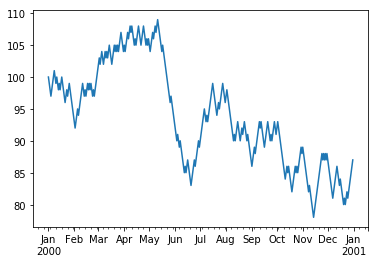

In [86]:
problem3_2(.5)

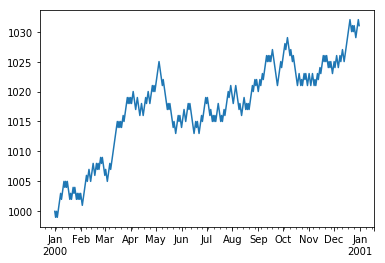

In [87]:
problem3_2(.5, d=1_000)

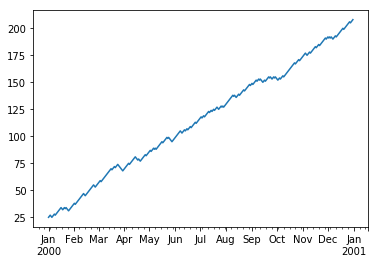

In [89]:
problem3_2(.6, d=25)

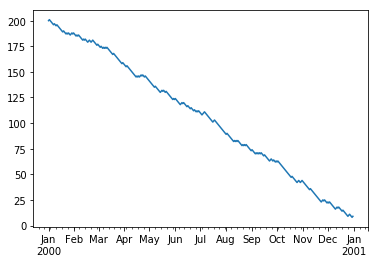

In [90]:
problem3_2(.25, d=200)

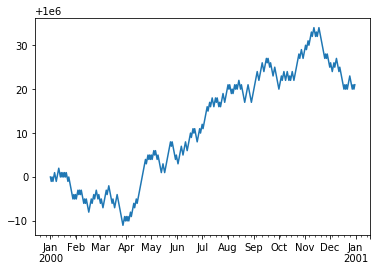

In [105]:
problem3_2(.51, d=1_000_000)

## Problem 3. {-}

In [111]:
#build toy data for SQL operations
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 
        'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 
                    'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 
                          'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd,
                         'Math_Major': major})

In [114]:
def problem3_3():
    # SELECT ID, Name from studentInfo WHERE Age > 19 AND Sex = "M"
    return studentInfo[(studentInfo['Age']>19) & 
            (studentInfo['Sex']=='M')][['ID','Name']]

In [116]:
print(problem3_3())

   ID   Name
0   0  Mylan
6   6   Matt


## Problem 4. {-}

In [132]:
def problem3_4():
    return pd.merge(studentInfo, otherInfo)[studentInfo['Sex']=='M'][['ID','Age','GPA']]

In [134]:
print(problem3_4())

   ID  Age  GPA
0   0   20  3.8
2   2   18  3.0
4   4   19  2.8
6   6   20  3.8
7   7   19  3.4


## Problem 5. {-}

In [514]:
def problem3_5():
    df = pd.read_csv('crime_data.csv', index_col='Year')
    df.dropna()
    df['Crime Rate'] = df['Total']/df['Population']
    
    plt.plot(df.index, df['Crime Rate'])
    plt.title("Crime rate over time")
    plt.xlabel("Year")
    plt.ylabel("Crime Rate")
    plt.show()
    
    print(
        "*  The top 5 highest-crime years on record are:\n\t"+
        str(np.flip(np.array(df.sort_values(by='Crime Rate').index[-5:]),0))
    )
    
    print(
        "*  Average number of total crimes, 1960-2012: "+
        str(int(round(df[(df.index>=1960) & (df.index<=2012)]['Total'].sum()/(2012-1960+1)))) +
        "\n*  Average number of burglaries, 1960-2012: "+
        str(int(round(df[(df.index>=1960) & (df.index<=2012)]['Burglary'].sum()/(2012-1960+1))))
    )
    
    avg_tot = df[(df.index>=1960) & (df.index<=2012)]['Total'].sum()/(2012-1960+1)
    avg_bur = df[(df.index>=1960) & (df.index<=2012)]['Burglary'].sum()/(2012-1960+1)
    
    print(
        "*  Years where the number of crimes was below average but the "+
        "number of burglaries was above average:\n\t"+
        str(np.array(df[(df['Total'] < avg_tot) & (df['Burglary'] > avg_bur)].index))
    )
    
    plt.plot(df['Population'], df['Murder'])
    plt.title("Murders as a function of population")
    plt.xlabel("Population")
    plt.ylabel("Murders")
    plt.show()
    
    df2 = df[df.index.isin(range(1980,1990))][['Population','Violent','Robbery']]
    
    return df2

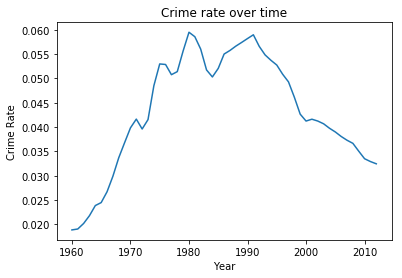

*  The top 5 highest-crime years on record are:
	[1980 1991 1981 1990 1989]
*  Average number of total crimes, 1960-2012: 10638068
*  Average number of burglaries, 1960-2012: 2446286
*  Years where the number of crimes was below average but the number of burglaries was above average:
	[1973 1974]


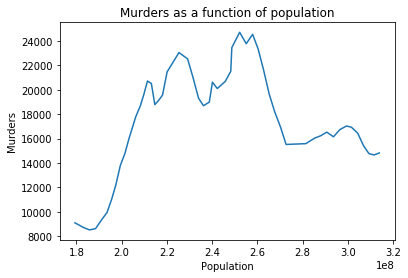

In [515]:
df2 = problem3_5()
df2.to_csv("crime_subset.csv")

## Problem 6. {-}

In [544]:
def problem3_6_1():
    df = pd.read_csv('titanic.csv')
    df = df.drop(columns=['Sibsp','Parch','Cabin','Boat','Body','home.dest'])
    df = df[df['Survived'].isna() == False]
    df['Survived'] = df['Survived'] == 1.0
    df['Age'] = df['Age'].fillna(df['Age'].sum()/df.shape[0])
    return df

In [545]:
titanic_clean = problem3_6_1()
titanic_clean.to_csv('titanic_clean.csv')

In [546]:
def problem3_6_2():
    df = pd.read_csv('titanic_clean.csv')
    
    print(
        '*  '+
        str(int(df['Survived'].sum()))+
        ' people survived, which comprises '+
        str(100*round(df['Survived'].sum()/df.shape[0],3))+
        '% of the passengers.'
        
        '\n*  The average price of a ticket was $'+
        str(round(df['Fare'].sum()/df.shape[0],2))+
        ', and the most expensive ticket was $'+
        str(round(df['Fare'].max(),2))+
        
        '.\n*  The oldest survivor was '+
        str(int(df[df['Survived']==True]['Age'].max()))+
        ', and the youngest survivor was '+
        str(round(df[df['Survived']==True]['Age'].min(),2))+
        '.\n*  The oldest non-survivor was '+
        str(int(df[df['Survived']==False]['Age'].max()))+
        ', and the youngest non-survivor was '+
        str(round(df[df['Survived']==False]['Age'].min(),2))+
        '.'
    )
    

In [547]:
problem3_6_2()

*  500 people survived, which comprises 38.2% of the passengers.
*  The average price of a ticket was $33.27, and the most expensive ticket was $512.33.
*  The oldest survivor was 80, and the youngest survivor was 0.17.
*  The oldest non-survivor was 74, and the youngest non-survivor was 0.33.


# Pandas 2

## Problem 1. {-}

In [553]:
!pip install pydataset

    100% |████████████████████████████████| 15.9MB 1.1MB/s ta 0:00:01    96% |███████████████████████████████ | 15.4MB 5.1MB/s eta 0:00:01
  Running setup.py bdist_wheel for pydataset ... done
  Stored in directory: /Users/hbeard/Library/Caches/pip/wheels/fe/3f/dc/5d02ccc767317191b12d042dd920fcf3432fab74bc7978598b
Successfully built pydataset


In [554]:
from pydataset import data

initiated datasets repo at: /Users/hbeard/.pydataset/


In [581]:
def problem4_1():
    mfb = data("Arbuthnot")
    road = data("road")
    bdr = data("birthdeathrates")
    bf = data("bfeed")
    bw = data("birthwt")
    
    fig, ax = plt.subplots(1,2)
    
    print(list(mfb['Year']))
    
    ax[0,0].plot(list(mfb['Year']), list(mfb['Ratio']), color="b")
#     ax[0,0].set_yticks(arange(min(gdp),max(gdp)+1,1000))
#     ax[0,0].set_yticklabels(gdp_labs,fontsize=8)
#     ax[0,0].set_xticks(countries)
#     ax[0,0].set_xticklabels(countries,fontsize=7,rotation=90)
#     ax[0,0].set_title("GDP by country (USD)")

    
#     ax[0,1].plot(gdppc, lm[0]*gdppc+lm[1],"m")
#     ax[0,1].set_xticks([0,25,50,75])
#     ax[0,1].set_xticklabels(["0", "25 K", "50 K", "75 K"])
#     ax[0,1].set_title("Avgerage height (cm) regressed \non GDP per capita (USD)")


#     plt.subplots_adjust(hspace=.9, wspace=.3)
    plt.show()
    
    
    
    
    print(mfb.head())
    print(road.head())
    print(bdr.head())
    print(bf.head())
    print(bw.head())
    

[1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710]


IndexError: too many indices for array

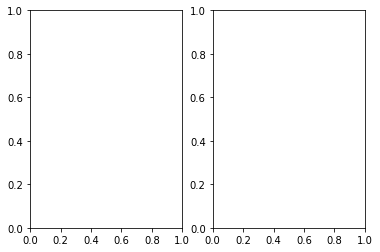

In [582]:
problem4_1()

# Pandas 3

## Problem 1. {-}

In [ ]:
def problem5_1():
    pass

## Problem 2. {-}

In [ ]:
def problem5_2():
    pass

## Problem 3. {-}

In [ ]:
def problem5_3():
    pass

# Pandas 4

## Problem 1. {-}

In [ ]:
def problem6_1():
    
    pass

## Problem 2. {-}

In [ ]:
def problem6_2():
    pass

## Problem 3. {-}

In [ ]:
def problem6_3():
    pass

## Problem 4. {-}

In [ ]:
def problem6_4():
    pass

## Problem 5. {-}

In [ ]:
def problem6_5():
    pass

## Problem 6. {-}

In [ ]:
def problem6_6():
    pass